<a href="https://colab.research.google.com/github/kevinyogap/pdf_to_txt/blob/main/Preproccesing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Extraction Data

##1.1 Text Based PDF to txt

### Import Library

In [ ]:
pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 54.6 MB/s eta 0:00:00


In [ ]:
import os
import pymupdf
import fitz
import re

###Read data jpg text based

In [ ]:
buku1 = pymupdf.open("PengantarBisnis.pdf")
buku1.metadata

{'format': 'PDF 1.7',
 'title': 'Pengantar Bisnis',
 'author': 'ZAEINAL',
 'subject': '',
 'keywords': '',
 'creator': 'Microsoft® Word 2010',
 'producer': 'Microsoft® Word 2010',
 'creationDate': "D:20210224160150+07'00'",
 'modDate': "D:20210226081822+07'00'",
 'trapped': '',
 'encryption': None}

Pengantar Bisnis


In [ ]:
# doc = fitz.open(buku1)
text = ''
for page in buku1:
    text += page.get_text("text") + "\n"

print(text)

 

  
 
 
 
 
 
 
 
Pengantar Bisnis  
 
  
 

UU No 28 tahun 2014 tentang Hak Cipta 
 
Fungsi dan sifat hak cipta Pasal 4  
Hak Cipta sebagaimana dimaksud dalam Pasal 3 huruf a merupakan hak eksklusif yang 
terdiri atas hak moral dan hak ekonomi. 
Pembatasan Pelindungan Pasal 26  
Ketentuan sebagaimana dimaksud dalam Pasal 23, Pasal 24, dan Pasal 25 tidak berlaku 
terhadap: 
i. 
penggunaan kutipan singkat Ciptaan dan/atau produk Hak Terkait untuk pelaporan 
peristiwa aktual yang ditujukan hanya untuk keperluan penyediaan informasi aktual;  
ii. 
Penggandaan Ciptaan dan/atau produk Hak Terkait hanya untuk kepentingan 
penelitian ilmu pengetahuan;  
iii. Penggandaan Ciptaan dan/atau produk Hak Terkait hanya untuk keperluan 
pengajaran, kecuali pertunjukan dan Fonogram yang telah dilakukan Pengumuman 
sebagai bahan ajar; dan  
iv. penggunaan untuk kepentingan pendidikan dan pengembangan ilmu pengetahuan 
yang memungkinkan suatu Ciptaan dan/atau produk Hak Terkait dapat digunakan 
tanpa i

###Split the data by chapter

In [ ]:
pattern = r"(BAB\s+\d+\s*\n[^\n]+)"

# Temukan semua judul bab menggunakan regex
matches = list(re.finditer(pattern, text, flags=re.MULTILINE))

# Simpan hasil dalam dictionary
bab_dict = {}

for i in range(len(matches)):
    start = matches[i].start()
    end = matches[i+1].start() if i+1 < len(matches) else len(text)
    bab_title = matches[i].group(0).strip()
    bab_content = text[start:end].strip()
    bab_dict[bab_title] = bab_content

# Tampilkan hasil
for title, content in bab_dict.items():
    print(f'=== {title} ===')
    print(content)
    print('\n')

=== BAB 1 
Ruang Lingkup Bisnis ===
BAB 1 
Ruang Lingkup Bisnis 
 
 
 
A. Pengertian Bisnis dan Jenisnya 
Bisnis adalah serangkaian usaha yang dilakukan satu orang 
atau kelompok dengan menawarkan barang dan jasa untuk men-
dapatkan keuntungan/laba atau bisnis juga bisa dikatakan me-
nyediakan barang dan jasa untuk ke lancaran sistem pereko-
nomian. 
Mereka harus siap untung & siap rugi, bisnis tidak hanya 
tergantung dengan modal uang, tetapi banyak faktor yang men-
dukung terlaksananya sebuah bisnis, misalnya: Reputasi, ke-
ahlian, ilmu, sahabat & kerabat dapat menjadi modal bisnis. 
Menurut Griffin & Eber bisnis merupakan suatu organisasi yang 
menyediakan barang atau jasa yang bertujuan untuk mendapat-
kan keuntungan. 
Bisnis dalam arti luas adalah istilah umum yang meng-
gambarkan semua aktifitas dan institusi yang memproduksi ba-
rang & jasa dalam kehidupan sehari-hari. Bisnis sebagai suatu 
sistem yang memproduksi barang dan jasa untuk memuaskan ke-
butuhan masyarakat (bussiness

In [ ]:
bab_dict

{'BAB 1 \nRuang Lingkup Bisnis': 'BAB 1 \nRuang Lingkup Bisnis \n \n \n \nA. Pengertian Bisnis dan Jenisnya \nBisnis adalah serangkaian usaha yang dilakukan satu orang \natau kelompok dengan menawarkan barang dan jasa untuk men-\ndapatkan keuntungan/laba atau bisnis juga bisa dikatakan me-\nnyediakan barang dan jasa untuk ke lancaran sistem pereko-\nnomian. \nMereka harus siap untung & siap rugi, bisnis tidak hanya \ntergantung dengan modal uang, tetapi banyak faktor yang men-\ndukung terlaksananya sebuah bisnis, misalnya: Reputasi, ke-\nahlian, ilmu, sahabat & kerabat dapat menjadi modal bisnis. \nMenurut Griffin & Eber bisnis merupakan suatu organisasi yang \nmenyediakan barang atau jasa yang bertujuan untuk mendapat-\nkan keuntungan. \nBisnis dalam arti luas adalah istilah umum yang meng-\ngambarkan semua aktifitas dan institusi yang memproduksi ba-\nrang & jasa dalam kehidupan sehari-hari. Bisnis sebagai suatu \nsistem yang memproduksi barang dan jasa untuk memuaskan ke-\nbutuhan m

In [ ]:
list(bab_dict.keys())

['BAB 1 \nRuang Lingkup Bisnis',
 'BAB 2 \nPerusahaan dan Lingkungan Perusahaan',
 'BAB 3 \nBentuk-bentuk Badan Usaha',
 'BAB 4 \nKewirausahaan dan Perusahaan Kecil',
 'BAB 5 \nManajemen dan Organisasi',
 'BAB 6 \nBudaya Organisasi',
 'BAB 7 \nEkonomi Bisnis',
 'BAB 8 \nPerilaku Bisnis',
 'BAB 9 \nKomunikasi Bisnis']

In [ ]:
keys = list(bab_dict.keys())
print(bab_dict[keys[1]])

BAB 2 
Perusahaan dan Lingkungan Perusahaan 
 
 
 
 
A. Pengertian Perusahaan 
Istilah perusahaan mulai dikenal pada saat disusunnya Ran-
cangan Wetboek van Koophandel (Kitab Undang-undang Hukum 
Dagang) yang berlaku di Netherland (Belanda) sejak tahun 1838. 
Berdasarkan asas konkordansi, Wetboek van Koophandel dinya-
takan pula berlaku di Hindia Belanda (Indonesia) sejak tahun 
1848 hingga saat ini. 
Dalam Rancangan Undang-undang Wetboek van Koophan-
del, yang disebut dengan perusahaan adalah keseluruhan perbu-
atan yang dilakukan secara tidak terputus-putus, dengan terang-
terangan, dan dalam kedudukan tertentu untuk mencari laba (ba-
gi diri sendiri). 
Selain pengertian tersebut, beberapa sarjana juga memberi-
kan pengertian tentang perusahaan.  
Menurut Prof. Mr. W.L.P.A. Molengraff, pengertian perusa-
haan dari sudut pandang ekonomi adalah keseluruhan perbuatan 
yang dilakukan secara terus-menerus, bertindak keluar untuk 
mendapatkan penghasilan dengan cara memperniagakan barang-


###Cleaning data with Regex

In [ ]:
import re

def bersihkan_teks(teks):
    # Gabungkan kata yang terpotong dengan tanda "-" di akhir baris ke baris berikutnya
    teks = re.sub(r'(\w+)-\s*\n\s*(\w+)', r'\1\2', teks)

    # Hapus nomor halaman seperti "2 |", "3|" di awal baris
    teks = re.sub(r'^\s*\d+\s*\|\s*', '', teks, flags=re.MULTILINE)

    # Hapus penanda halaman seperti "Pengantar Bisnis | 3"
    teks = re.sub(r'Pengantar Bisnis\s+\|\s+\d+', '', teks, flags=re.IGNORECASE)

    # Ganti simbol & dengan "dan"
    teks = teks.replace('&', 'dan')

    # Tambahkan newline sebelum dan sesudah judul BAB
    teks = re.sub(r'\n?(BAB\s+[IVXLC\d]+\s+.*?)(\n|$)', r'\n\n\1\n\n', teks, flags=re.IGNORECASE)

    # Gabungkan baris menjadi satu paragraf (kecuali jika ada 2 newline)
    teks = re.sub(r'(?<!\n)\n(?!\n)', ' ', teks)

    # Hapus spasi di awal dan akhir baris
    teks = '\n'.join([baris.strip() for baris in teks.splitlines()])

    # Hapus baris kosong berlebihan (lebih dari 1 jadi 1)
    teks = re.sub(r'\n{2,}', '\n\n', teks)

    # Hapus spasi horizontal ganda
    teks = re.sub(r'[ \t]+', ' ', teks)

    return teks.strip()


In [ ]:
bab_dict_bersih = {}
for key, value in bab_dict.items():
    key_bersih = bersihkan_teks(key)
    value_bersih = bersihkan_teks(value)
    bab_dict_bersih[key_bersih] = value_bersih


In [ ]:
bab_dict_bersih

{'BAB 1 Ruang Lingkup Bisnis': 'BAB 1 Ruang Lingkup Bisnis\n\nA. Pengertian Bisnis dan Jenisnya Bisnis adalah serangkaian usaha yang dilakukan satu orang atau kelompok dengan menawarkan barang dan jasa untuk mendapatkan keuntungan/laba atau bisnis juga bisa dikatakan menyediakan barang dan jasa untuk ke lancaran sistem perekonomian. Mereka harus siap untung dan siap rugi, bisnis tidak hanya tergantung dengan modal uang, tetapi banyak faktor yang mendukung terlaksananya sebuah bisnis, misalnya: Reputasi, keahlian, ilmu, sahabat dan kerabat dapat menjadi modal bisnis. Menurut Griffin dan Eber bisnis merupakan suatu organisasi yang menyediakan barang atau jasa yang bertujuan untuk mendapatkan keuntungan. Bisnis dalam arti luas adalah istilah umum yang menggambarkan semua aktifitas dan institusi yang memproduksi barang dan jasa dalam kehidupan sehari-hari. Bisnis sebagai suatu sistem yang memproduksi barang dan jasa untuk memuaskan kebutuhan masyarakat (bussinessis then simply a system tha

In [ ]:
list(bab_dict_bersih.keys())


['BAB 1 Ruang Lingkup Bisnis',
 'BAB 2 Perusahaan dan Lingkungan Perusahaan',
 'BAB 3 Bentuk-bentuk Badan Usaha',
 'BAB 4 Kewirausahaan dan Perusahaan Kecil',
 'BAB 5 Manajemen dan Organisasi',
 'BAB 6 Budaya Organisasi',
 'BAB 7 Ekonomi Bisnis',
 'BAB 8 Perilaku Bisnis',
 'BAB 9 Komunikasi Bisnis']

In [ ]:
keys = list(bab_dict_bersih.keys())
print(bab_dict_bersih[keys[2]])

BAB 3 Bentuk-bentuk Badan Usaha

A. Bentuk Yuridis Perusahaan Badan usaha adalah kesatuan yuridis dan ekonomis dari faktor-faktor produksi yang bertujuan mencari laba atau memberi layanan kepada masyarakat. Disebut kesatuan yuridis karena badan usaha umumnya berbadan hukum. Disebut kesatuan ekonomis karena faktor-faktor produksi yang terdiri dari asas sumber daya alam, modal, dan tenaga kerja dikombinasikan untuk mendapat laba atau memberi layanan kepada masyarakat. Badan usaha seringkali disamakan dengan perusahaan, walaupun pada kenyataannya berbeda. Perbedaan utamanya, badan usaha adalah lembaga, sementara perusahaan adalah tempat di mana badan usaha itu mengelola faktor-faktor produksi. Bentuk-bentuk pemilikan perusahaan: 1. Perusahaan Perseorangan Perusahaan perseorangan adalah perusahaan yang dikelola dan diawasi oleh satu orang. Di satu sisi lain juga menanggung semua keuntungan perusahaan, di sisi lain juga menanggung semua resiko yanng timbul dalam kegiatan perusahaan. Perusah

In [ ]:
title = buku1.metadata["title"]
print(title)

Pengantar Bisnis


### Export data to a text file

In [ ]:
output_folder = "buku1"

os.makedirs(output_folder, exist_ok=True)

for section, content in bab_dict_bersih.items():
    filename = f"{title}_{section}.txt"
    filepath = os.path.join(output_folder, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(content)
    # print(f"Saved section '{section}' to file: {filepath}")


In [ ]:
# for content in bab_dict():
#     filename = f"{title}.txt"  # nama file sesuai key dictionary
#     with open(filename, "w", encoding="utf-8") as f:
#         f.write(content)
#     print(f"Saved section '{section}' to file: {filename}")

## 1.2 Text image based PDF

### Import Library

In [ ]:
pip install pytesseract

In [ ]:
!sudo apt install -y tesseract-ocr
!sudo apt install -y tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 0s (2,008 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend:

In [ ]:
import fitz
import pytesseract
from PIL import Image
import io

### Read data image based

In [ ]:
buku2 = pymupdf.open("bukufilsafat.pdf")
buku2.metadata

{'format': 'PDF 1.4',
 'title': 'Filsafat Ilmu Pengetahuan',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': '',
 'producer': 'Skia/PDF m100',
 'creationDate': '',
 'modDate': '',
 'trapped': '',
 'encryption': None}

In [ ]:
title = buku2.metadata["title"]
print(title)

Filsafat Ilmu Pengetahuan


In [ ]:
text = ''

for page_num in range(len(buku2)):
    page = buku2.load_page(page_num)
    pix = page.get_pixmap()
    img = Image.open(io.BytesIO(pix.tobytes("png")))
    text += pytesseract.image_to_string(img, lang="ind")
    # print(text)


In [ ]:
print(text)

Nengah Bawa Atmadja
antawikrama Tungga Atmadja

 
FILSAFAT
ILMU PENGETAHUAN

Perspektif Proses dan Produk

NENGAH BAWA ATMADJA
ANANTAWIKRAMA TUNGGA ATMADJA

Pustaka Larasan
2014

Dipindai dengan CamScanner
KATA PENGANTAR

uji syukur kami ucapakan kepada Ida Sang Iyang Widdht Wasa,

mengingat berkat perlindungan: Nya-lah kami bisa menyelesaikan
penulisan bukuini sesuai denganapa yangkami rencanakan, Walaupun
isinya masih jauh dari kesempurnaan, namun kami berharap buku ini
bisadipakaisebagai bahan dasarguna memahamihakikat pengetahuan
(Apa itu pengetahuan?) dan hakikat ilmu (Apa itu ilmu?) baik sebagai
proses maupun produk dalam konteks penumbuhkembangan
budaya akademik terutama di kalangan para mahasiswa $2, Adapun
mahasiswa yang kami maksud secara khusus adalah mahasiswa 52
Jurusan Administrasi Pendidikan (AP), $2 Jurusan Penelitian dan
Evaluasi Pendidikan (PEP), Jurusan Pendidikan Dasar (Pendas) dan
S2 Jurusan Pendidikan Ilmu Pengetahuan Soslal (PIPS) pada Program
Pascasarjana Univ

### Split data by chapter

In [ ]:
# Pola regex: BAB + nomor + newline + baris judul pertama (tidak kosong)
pattern = r"(BAB\s*\d+\s*\n[^\n]+)"

# Temukan semua judul bab
matches = list(re.finditer(pattern, text, flags=re.MULTILINE | re.IGNORECASE))

bab_dict = {}

for i in range(len(matches)):
    start = matches[i].start()
    end = matches[i+1].start() if i+1 < len(matches) else len(text)
    bab_title = matches[i].group(0).strip()
    bab_content = text[start:end].strip()
    bab_dict[bab_title] = bab_content

# Tampilkan hasil
for title, content in bab_dict.items():
    print(f"=== {title} ===")
    print(content)
    print('\n')

=== BAB1
PENGERTIAN FILSAFAT ===
BAB1
PENGERTIAN FILSAFAT
(Suatu pengantar)

ab ini memberikan pengantar tentang hakikat filsafat dilihat dari

segi etimologi, terminologi, fisafat sebagai pandangan hidup dan
filsafat sebagai ilmu. Filsafat sebagai ilmu mengandung makna, bahwa
filsafat tidak saja memiliki ontologi, epistemologi, dan aksiologi.
Filsafat lebih banyak bermuatan koginisi dan kurang bermuatan
keterampilan teknologis. Walaupun demikian aspek praksisnya tidak
bisa diabaikan, yakni filsafat memberikan resep bertindak dalam
konteks penumbuhan keterampilan sosial yang bijaksana dalam
kehidupan bermasyarakat, bernegara dan berbangsa.

Filsafat memiliki berbagai cabang atau bidang. Pembidangan
ini menandakan cakupan filsafat sangat luas. Filsafat adalah induk
ilmu pengetahuan, mengingat ilmu lahir dari filsafat. Walaupun ilmu
lahir dari filsafat, namun antara ilmu dan filsafat, selain memiliki
kesamaan, secara substansial, keduanya memiliki pula perbedaan.
Filsafat sebagai sumber 

In [ ]:
list(bab_dict.keys())

['BAB1\nPENGERTIAN FILSAFAT',
 'BAB 2\nFILSAFAT PENGETAHUAN',
 'BAB3\n\nFILSAFAT ILMU']

In [ ]:
keys = list(bab_dict.keys())
print(bab_dict[keys[0]])

BAB1
PENGERTIAN FILSAFAT
(Suatu pengantar)

ab ini memberikan pengantar tentang hakikat filsafat dilihat dari

segi etimologi, terminologi, fisafat sebagai pandangan hidup dan
filsafat sebagai ilmu. Filsafat sebagai ilmu mengandung makna, bahwa
filsafat tidak saja memiliki ontologi, epistemologi, dan aksiologi.
Filsafat lebih banyak bermuatan koginisi dan kurang bermuatan
keterampilan teknologis. Walaupun demikian aspek praksisnya tidak
bisa diabaikan, yakni filsafat memberikan resep bertindak dalam
konteks penumbuhan keterampilan sosial yang bijaksana dalam
kehidupan bermasyarakat, bernegara dan berbangsa.

Filsafat memiliki berbagai cabang atau bidang. Pembidangan
ini menandakan cakupan filsafat sangat luas. Filsafat adalah induk
ilmu pengetahuan, mengingat ilmu lahir dari filsafat. Walaupun ilmu
lahir dari filsafat, namun antara ilmu dan filsafat, selain memiliki
kesamaan, secara substansial, keduanya memiliki pula perbedaan.
Filsafat sebagai sumber kebenaran dalam konteks pandangan

### Cleaning Data

In [ ]:

def bersihkan_teks_buku(teks):
    # Gabungkan kata yang terpotong karena tanda "-"
    teks = re.sub(r'(\w+)-\s*\n\s*(\w+)', r'\1\2', teks)

    # Hapus artefak scanner dan simbol aneh seperti &1, |, | | |
    teks = re.sub(r'Dipindai dengan CamScanner.*', '', teks)
    teks = re.sub(r'^\s*\d+\s*\|?\s*$', '', teks, flags=re.MULTILINE)
    teks = re.sub(r'^\s*[&|]+\s*$', '', teks, flags=re.MULTILINE)  # <- ini untuk simbol &1, | | |

    # Gabungkan baris menjadi paragraf (kecuali jika ada 2 newline)
    teks = re.sub(r'(?<!\n)\n(?!\n)', ' ', teks)

    # Bersihkan spasi dan baris kosong berlebihan
    teks = '\n'.join(baris.strip() for baris in teks.splitlines())
    teks = re.sub(r'\n{2,}', '\n\n', teks)
    teks = re.sub(r'[ \t]+', ' ', teks)

    return teks.strip()

def bersihkan_judul_bab(judul):
    # Ubah ke Title Case dan gabungkan baris judul
    judul = judul.replace('\n', ' ').strip()
    judul = re.sub(r'[ \t]+', ' ', judul)

    # Pisahkan subjudul jika ada tanda kurung
    if '(' in judul and ')' in judul:
        sebelum, sesudah = judul.split('(', 1)
        judul_baru = f"{sebelum.strip().title()} ({sesudah.strip()}"
    else:
        judul_baru = judul.title()

    return judul_baru


In [ ]:
bab_dict_bersih = {}
for key, value in bab_dict.items():
    key_bersih = bersihkan_judul_bab(key)
    value_bersih = bersihkan_teks_buku(value)
    bab_dict_bersih[key_bersih] = value_bersih


In [ ]:
list(bab_dict_bersih)

['Bab1 Pengertian Filsafat',
 'Bab 2 Filsafat Pengetahuan',
 'Bab3 Filsafat Ilmu']

In [ ]:
keys = list(bab_dict_bersih.keys())  # bikin list dari keys
print(bab_dict_bersih[keys[0]])

BAB1 PENGERTIAN FILSAFAT (Suatu pengantar)

ab ini memberikan pengantar tentang hakikat filsafat dilihat dari

segi etimologi, terminologi, fisafat sebagai pandangan hidup dan filsafat sebagai ilmu. Filsafat sebagai ilmu mengandung makna, bahwa filsafat tidak saja memiliki ontologi, epistemologi, dan aksiologi. Filsafat lebih banyak bermuatan koginisi dan kurang bermuatan keterampilan teknologis. Walaupun demikian aspek praksisnya tidak bisa diabaikan, yakni filsafat memberikan resep bertindak dalam konteks penumbuhan keterampilan sosial yang bijaksana dalam kehidupan bermasyarakat, bernegara dan berbangsa.

Filsafat memiliki berbagai cabang atau bidang. Pembidangan ini menandakan cakupan filsafat sangat luas. Filsafat adalah induk ilmu pengetahuan, mengingat ilmu lahir dari filsafat. Walaupun ilmu lahir dari filsafat, namun antara ilmu dan filsafat, selain memiliki kesamaan, secara substansial, keduanya memiliki pula perbedaan. Filsafat sebagai sumber kebenaran dalam konteks pandangan

### Export data to txt

In [ ]:
title = buku2.metadata["title"]
print(title)

Filsafat Ilmu Pengetahuan


In [ ]:
output_folder = "buku2"

os.makedirs(output_folder, exist_ok=True)

for section, content in bab_dict_bersih.items():
    filename = f"{title}_{section}.txt"
    filepath = os.path.join(output_folder, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(content)
    # print(f"Saved section '{section}' to file: {filepath}")

#2 Indexing & Vectorization


##Book 1

### Embedding with SenteceTransformer

In [ ]:
# from sentence_transformers import SentenceTransformer

# # Load model pre-trained
# model = SentenceTransformer('all-MiniLM-L6-v2')


# folder_path = '/content/buku1'


# documents = []
# file_names = []

# for file in os.listdir(folder_path):
#     if file.endswith('.txt'):
#         file_path = os.path.join(folder_path, file)
#         with open(file_path, 'r', encoding='utf-8') as f:
#             content = f.read()
#             documents.append(content)
#             file_names.append(file)


# # Membuat embedding dari seluruh dokumen
# embeddings = model.encode(documents)



In [ ]:
import os
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
folder_path = '/content/buku1'

documents = []
file_names = []

files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
files = sorted(files)  # urutkan secara alfabetis

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        documents.append(content)
        file_names.append(file)

embeddings = model.encode(documents)


In [ ]:
documents

['BAB 1 Ruang Lingkup Bisnis\n\nA. Pengertian Bisnis dan Jenisnya Bisnis adalah serangkaian usaha yang dilakukan satu orang atau kelompok dengan menawarkan barang dan jasa untuk mendapatkan keuntungan/laba atau bisnis juga bisa dikatakan menyediakan barang dan jasa untuk ke lancaran sistem perekonomian. Mereka harus siap untung dan siap rugi, bisnis tidak hanya tergantung dengan modal uang, tetapi banyak faktor yang mendukung terlaksananya sebuah bisnis, misalnya: Reputasi, keahlian, ilmu, sahabat dan kerabat dapat menjadi modal bisnis. Menurut Griffin dan Eber bisnis merupakan suatu organisasi yang menyediakan barang atau jasa yang bertujuan untuk mendapatkan keuntungan. Bisnis dalam arti luas adalah istilah umum yang menggambarkan semua aktifitas dan institusi yang memproduksi barang dan jasa dalam kehidupan sehari-hari. Bisnis sebagai suatu sistem yang memproduksi barang dan jasa untuk memuaskan kebutuhan masyarakat (bussinessis then simply a system that produces goods and service t

In [ ]:
file_names

['Pengantar Bisnis_BAB 1 Ruang Lingkup Bisnis.txt',
 'Pengantar Bisnis_BAB 2 Perusahaan dan Lingkungan Perusahaan.txt',
 'Pengantar Bisnis_BAB 3 Bentuk-bentuk Badan Usaha.txt',
 'Pengantar Bisnis_BAB 4 Kewirausahaan dan Perusahaan Kecil.txt',
 'Pengantar Bisnis_BAB 5 Manajemen dan Organisasi.txt',
 'Pengantar Bisnis_BAB 6 Budaya Organisasi.txt',
 'Pengantar Bisnis_BAB 7 Ekonomi Bisnis.txt',
 'Pengantar Bisnis_BAB 8 Perilaku Bisnis.txt',
 'Pengantar Bisnis_BAB 9 Komunikasi Bisnis.txt']

In [ ]:
print(embeddings.shape)

(9, 384)


In [ ]:
embeddings

array([[ 0.03,  0.08, -0.09, ..., -0.01, -0.07, -0.05],
       [ 0.01,  0.04, -0.04, ...,  0.01, -0.05, -0.03],
       [-0.01, -0.02, -0.04, ...,  0.02, -0.03,  0.01],
       ...,
       [-0.04,  0.07, -0.01, ...,  0.02, -0.1 ,  0.  ],
       [-0.02,  0.05, -0.05, ...,  0.02, -0.04, -0.08],
       [-0.01,  0.03, -0.04, ..., -0.01, -0.07, -0.02]], dtype=float32)

In [ ]:
np.isnan(embeddings).any()

np.False_

In [ ]:
import pandas as pd

df = pd.DataFrame(embeddings)

# Simpan ke file CSV
df.to_csv("embeddings.csv", index=False)


In [ ]:
import numpy as np
import sklearn

from sklearn.metrics.pairwise import cosine_similarity
similarities_matrix = cosine_similarity(embeddings)

import numpy as np
np.set_printoptions(precision=2)
print(similarities_matrix)


[[1.   0.6  0.59 0.59 0.61 0.54 0.71 0.69 0.76]
 [0.6  1.   0.67 0.67 0.72 0.67 0.66 0.61 0.72]
 [0.59 0.67 1.   0.7  0.65 0.68 0.71 0.66 0.69]
 [0.59 0.67 0.7  1.   0.69 0.7  0.7  0.66 0.69]
 [0.61 0.72 0.65 0.69 1.   0.7  0.66 0.64 0.69]
 [0.54 0.67 0.68 0.7  0.7  1.   0.64 0.66 0.62]
 [0.71 0.66 0.71 0.7  0.66 0.64 1.   0.69 0.76]
 [0.69 0.61 0.66 0.66 0.64 0.66 0.69 1.   0.68]
 [0.76 0.72 0.69 0.69 0.69 0.62 0.76 0.68 1.  ]]


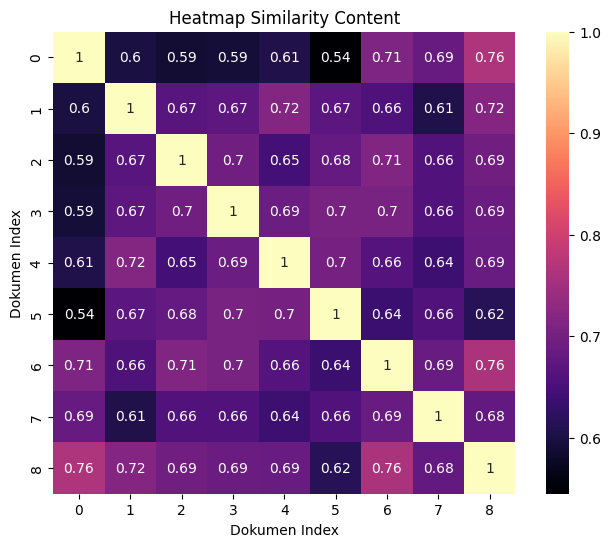

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(similarities_matrix, annot=True, cmap='magma', square=True)
plt.title('Heatmap Similarity Content')
plt.xlabel('Dokumen Index')
plt.ylabel('Dokumen Index')
plt.show()

In [ ]:
documents[0]

'BAB 1 Ruang Lingkup Bisnis\n\nA. Pengertian Bisnis dan Jenisnya Bisnis adalah serangkaian usaha yang dilakukan satu orang atau kelompok dengan menawarkan barang dan jasa untuk mendapatkan keuntungan/laba atau bisnis juga bisa dikatakan menyediakan barang dan jasa untuk ke lancaran sistem perekonomian. Mereka harus siap untung dan siap rugi, bisnis tidak hanya tergantung dengan modal uang, tetapi banyak faktor yang mendukung terlaksananya sebuah bisnis, misalnya: Reputasi, keahlian, ilmu, sahabat dan kerabat dapat menjadi modal bisnis. Menurut Griffin dan Eber bisnis merupakan suatu organisasi yang menyediakan barang atau jasa yang bertujuan untuk mendapatkan keuntungan. Bisnis dalam arti luas adalah istilah umum yang menggambarkan semua aktifitas dan institusi yang memproduksi barang dan jasa dalam kehidupan sehari-hari. Bisnis sebagai suatu sistem yang memproduksi barang dan jasa untuk memuaskan kebutuhan masyarakat (bussinessis then simply a system that produces goods and service to

In [ ]:
documents[8]

"BAB 9 Komunikasi Bisnis\n\nA. Latar Belakang Komunikasi bisnis adalah komunikasi yang digunakan dalam dunia bisnis yang mencakup berbagai macam jenis dan bentuk komunikasi untuk mencapai tujuan bisnis. Pengusaha harus berusaha untuk menutup jurang yang terbentang antara produsen dengan konsumen selaku pembeli atau pemakai barang dan jasa yang dihasilkan. Menjadi tugas dan tanggung jawabnya bagi seorang pengusaha untuk selalu dapat mempengaruhi besarnya permintaan akan barang produksi perusahaannya. Sebagai pengusaha dia harus memberitakan penyempurnaan-penyempurnaan produksi yang telah dicapainya, di mana barang yang dihasilkan dapat sampai ke tangan konsumen. Penyelenggaraan komunikasi dengan pasar merupakan suatu syarat mutlak bagi setiap pengusaha yang ingin menjamin kelangsungan hidup dan masa depan perusahaan untuk maju berkembang. Dalam lingkungan bisnis, ada aneka ragam komunikasi yang telah ada untuk perdagangan yang dapat dipergunakan para pengusaha untuk berkomunikasi dengan

#Reference

[pdf_ocr_extrator_github](https://github.com/dineshram0212/pdf-ocr-extractor)

[Sentence Transformers ](https://youtu.be/OlhNZg4gOvA?si=IrbNOh4X7x0DSAvW)

[extract_text_from_pdf_pymupdf](https://opstree.com/blog/2025/02/11/extract-text-from-pdf-using-pymupdf-fitz/)